In [65]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from scipy.stats import ttest_ind
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate, KFold

### Carregamento e pré-processamento dos dados;

In [66]:
breast_cancer_dict = load_breast_cancer()
breast_cancer_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [67]:
breast_cancer_df = pd.DataFrame(breast_cancer_dict['data'], columns=breast_cancer_dict['feature_names'])
breast_cancer_df['target'] = breast_cancer_dict['target']
target_names = dict(enumerate(breast_cancer_dict.target_names)) 
breast_cancer_df['target_name'] = breast_cancer_df['target'].map(target_names)

breast_cancer_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [68]:
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [69]:
print(breast_cancer_df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
target_name                0
dtype: int64


#### PAIRPLOT

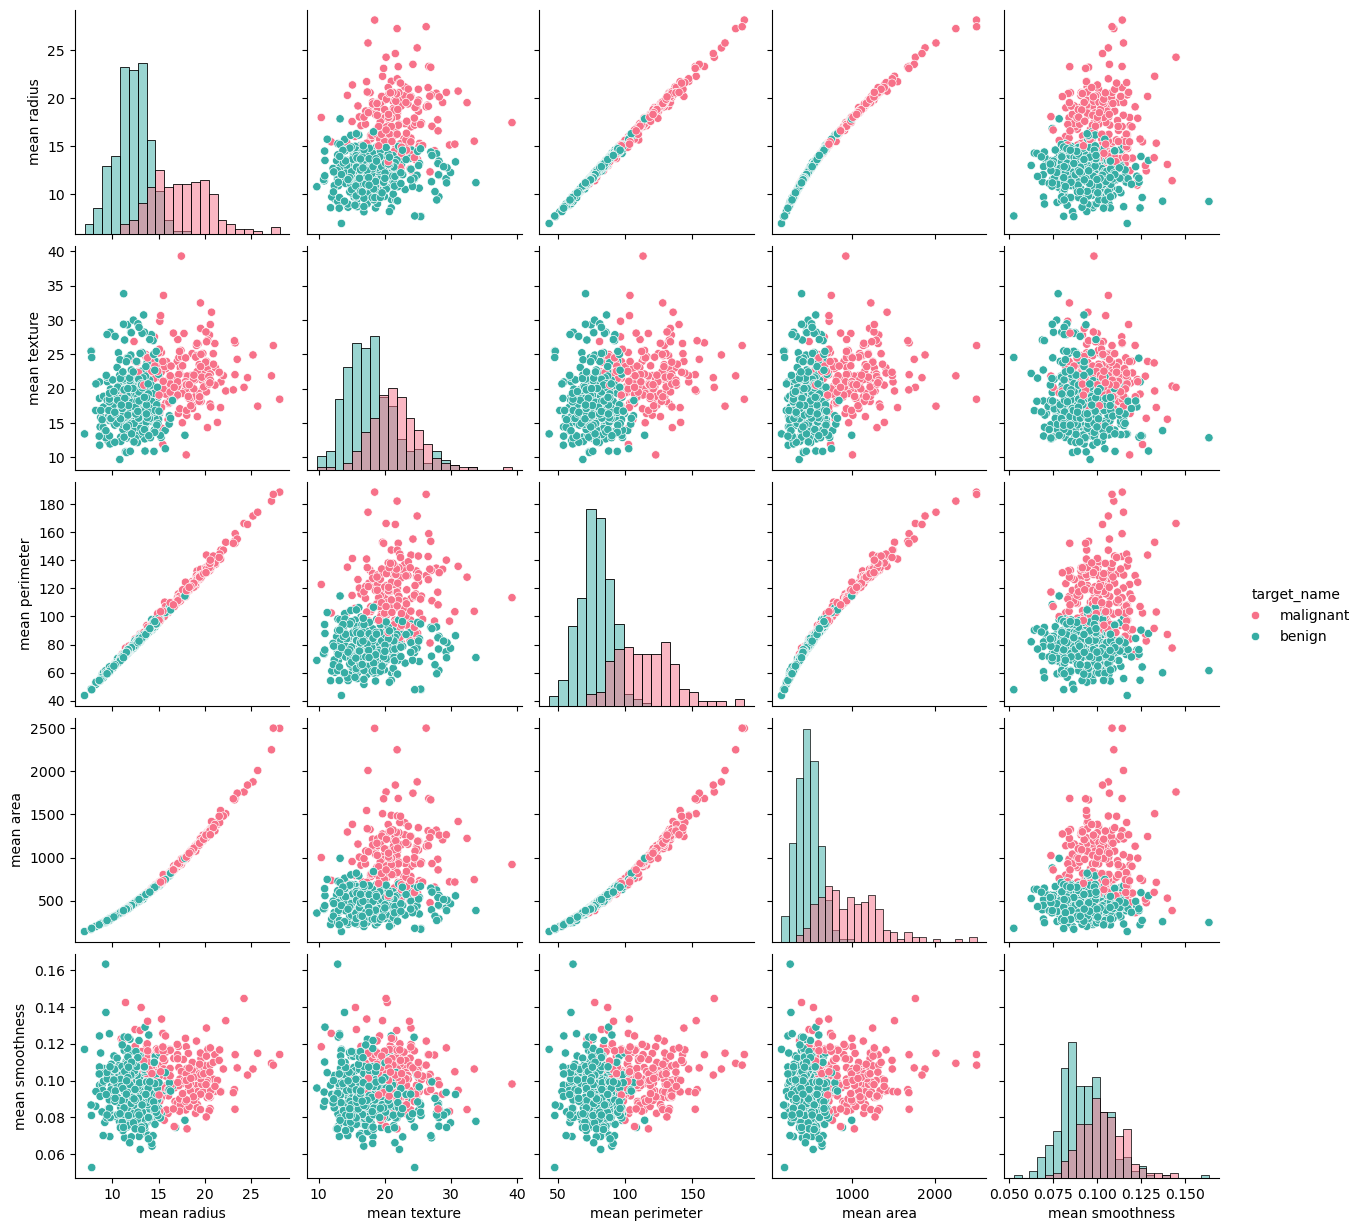

In [70]:
mean_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

sns.pairplot(breast_cancer_df[mean_features + ['target_name']], hue='target_name', diag_kind='hist', palette='husl')

#### Seleção de Features

In [71]:
testt_features = []
df = breast_cancer_df.copy()
target_maligno = df[df['target'] == 0]  
target_benigno = df[df['target'] == 1]  


for col in df.drop(['target', 'target_name'], axis=1).columns:
    stat, p_valor = ttest_ind(target_maligno[col], target_benigno[col])
    testt_features.append({'feature': col, 'p-valor': p_valor})


df_resultados_testt = pd.DataFrame(testt_features)
df_resultados_testt = df_resultados_testt.sort_values(by='p-valor')


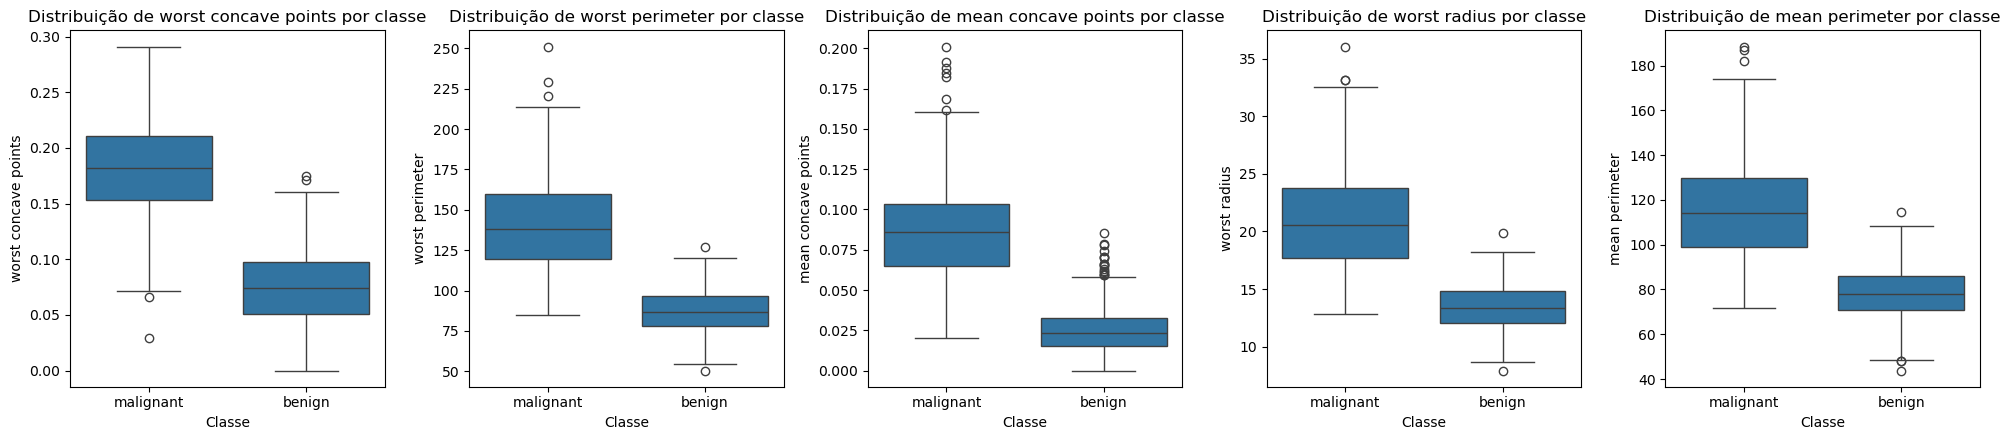

In [72]:
features_relevantes = df_resultados_testt['feature'].head(5).tolist()

fig, axs = plt.subplots(1, 5, figsize=(20, 4.5))  
for i, ax in enumerate(axs):
    sns.boxplot(x='target_name', y=features_relevantes[i], data=df, ax=ax)
    ax.set_title(f'Distribuição de {features_relevantes[i]} por classe')
    ax.set_xlabel('Classe')
    ax.set_ylabel(features_relevantes[i])

plt.tight_layout()
plt.show()

#### Separação treino e teste - hold-out

In [ ]:
X = breast_cancer_df[features_relevantes]
y = breast_cancer_df['target']


random_seed = 42
np.random.seed(random_seed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,  test_size=0.2, random_state=random_seed)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### Treinamento e avaliação de modelos de classificação;

In [74]:
num_folds = 5
results_knn = []
kf = KFold(n_splits=num_folds, shuffle=True, random_state=random_seed)

evaluation_metrics = ['accuracy', 'precision', 'recall', 'f1']
metrics_dict = {
  'accuracy': make_scorer(accuracy_score),
  'precision': make_scorer(precision_score, average='binary'),  
  'recall': make_scorer(recall_score, average='binary'),
  'f1': make_scorer(f1_score, average='binary')
}

#### Usando o algoritmo K-Nearest Neighbors (KNN)

In [75]:
results_knn = []

ks = range(1, 28, 2) 
best_k = None

best_score_knn = 0
best_metric_knn = None

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    train_scores = cross_validate(knn, X_train_scaled, y_train, cv=kf, scoring=metrics_dict)
    media_metrics = {metric: np.mean(train_scores[f'test_{metric}']) for metric in evaluation_metrics}
    media_metrics["k"] = k
    results_knn.append(media_metrics)

    for metric in evaluation_metrics:
        score = media_metrics[metric]
        if score > best_score_knn:
            best_score_knn = score
            best_metric_knn = metric
            best_k = k


for resultado in results_knn:
    print(f"k={resultado['k']}: "
    f"Accuracy={resultado['accuracy']:.2f}, "
    f"Precision={resultado['precision']:.2f}, "
    f"Recall={resultado['recall']:.2f}, "
    f"F1={resultado['f1']:.2f}")
    
print(f"\n Melhor valor de k: {best_k}. Melhor metrica: {best_metric_knn}, com score médio de {best_score_knn * 100:.2f}%")

k=1: Accuracy=0.92, Precision=0.95, Recall=0.93, F1=0.94
k=3: Accuracy=0.95, Precision=0.95, Recall=0.98, F1=0.96
k=5: Accuracy=0.95, Precision=0.94, Recall=0.98, F1=0.96
k=7: Accuracy=0.95, Precision=0.94, Recall=0.98, F1=0.96
k=9: Accuracy=0.94, Precision=0.94, Recall=0.98, F1=0.96
k=11: Accuracy=0.95, Precision=0.93, Recall=0.98, F1=0.96
k=13: Accuracy=0.94, Precision=0.94, Recall=0.98, F1=0.96
k=15: Accuracy=0.95, Precision=0.94, Recall=0.98, F1=0.96
k=17: Accuracy=0.94, Precision=0.94, Recall=0.98, F1=0.96
k=19: Accuracy=0.94, Precision=0.93, Recall=0.98, F1=0.96
k=21: Accuracy=0.94, Precision=0.93, Recall=0.98, F1=0.95
k=23: Accuracy=0.94, Precision=0.93, Recall=0.98, F1=0.96
k=25: Accuracy=0.95, Precision=0.94, Recall=0.98, F1=0.96
k=27: Accuracy=0.94, Precision=0.93, Recall=0.98, F1=0.96

 Melhor valor de k: 11. Melhor metrica: recall, com score médio de 98.30%


##### Re-treino e avaliação do KNN

In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

y_pred_knn = knn_final.predict(X_test_scaled)
r_score_knn = f"{recall_score(y_test, y_pred_knn, average='binary')* 100:.2f}%"

print("Recall score com o conjunto de teste: ", r_score_knn)

print("\nMétricas no conjunto de teste (modelo final re-treinado):")
print(classification_report(y_test, y_pred_knn, digits=3))

Recall score com o conjunto de teste:  97.18%

Métricas no conjunto de teste (modelo final re-treinado):
              precision    recall  f1-score   support

           0      0.953     0.953     0.953        43
           1      0.972     0.972     0.972        71

    accuracy                          0.965       114
   macro avg      0.963     0.963     0.963       114
weighted avg      0.965     0.965     0.965       114



### Modelo de classificação com Regressão Logística

In [ ]:
results_logreg = []

best_c = None
c_list = [0.01, 0.1, 1, 10, 100]
best_score_logreg = 0
best_metric_logreg = None

for c in c_list:
    logreg = LogisticRegression(C=c, penalty='l2', random_state=random_seed, solver='lbfgs', max_iter=1000)
    train_scores = cross_validate(logreg, X_train_scaled, y_train, cv=kf, scoring=metrics_dict)

    media_metrics = {metric: np.mean(train_scores[f'test_{metric}']) for metric in evaluation_metrics}
    media_metrics["C"] = c
    results_logreg.append(media_metrics)

    for metric in evaluation_metrics:
        score = media_metrics[metric]
        if score > best_score_logreg:
            best_score_logreg = score
            best_metric_logreg = metric
            best_c = c


for resultado in results_logreg:
    print(f"C={resultado['C']}: "
    f"Accuracy={resultado['accuracy']:.2f}, "
    f"Precision={resultado['precision']:.2f}, "
    f"Recall={resultado['recall']:.2f}, "
    f"F1={resultado['f1']:.2f}")
    
print(f"\nMelhor métrica: {best_metric_logreg}, com score médio de {best_score_logreg * 100:.2f}%")


C=0.01: Accuracy=0.92, Precision=0.89, Recall=0.99, F1=0.94
C=0.1: Accuracy=0.94, Precision=0.93, Recall=0.98, F1=0.95
C=1: Accuracy=0.94, Precision=0.94, Recall=0.96, F1=0.95
C=10: Accuracy=0.95, Precision=0.96, Recall=0.97, F1=0.96
C=100: Accuracy=0.95, Precision=0.96, Recall=0.97, F1=0.96

Melhor métrica: recall, com score médio de 99.33%


In [ ]:
logre_final = LogisticRegression(C=best_c, penalty='l2', random_state=random_seed, solver='lbfgs', max_iter=1000)
logre_final.fit(X_train_scaled, y_train)

y_pred_lgr = logre_final.predict(X_test_scaled)
r_score_lgr = f"{recall_score(y_test, y_pred_lgr, average='binary')* 100:.2f}%"

print("Recall score com o conjunto de teste:", r_score_lgr)

print("\nMétricas no conjunto de teste (modelo final re-treinado):")
print(classification_report(y_test, y_pred_lgr, digits=3))

Recall score com o conjunto de teste: 100.00%

Métricas no conjunto de teste (modelo final re-treinado):
              precision    recall  f1-score   support

           0      1.000     0.884     0.938        43
           1      0.934     1.000     0.966        71

    accuracy                          0.956       114
   macro avg      0.967     0.942     0.952       114
weighted avg      0.959     0.956     0.956       114



#### comparação critica entre os resultados das métricas entre os dois modelos

In [ ]:

models_metrics = [
  {
    "modelo": "KNN",
    "validação cruzada": f'{best_score_knn * 100:.2f}%',
    "re-treinamento": r_score_knn,
    "ROC AUC socre": f'{roc_auc_score(y_test,  y_pred_knn) * 100:.2f} %'
  },
  {
    "modelo": "Regressão Logística",
    "validação cruzada": f'{best_score_logreg * 100:.2f}%',
    "re-treinamento": r_score_lgr,
    "ROC AUC socre": f'{roc_auc_score(y_test,  y_pred_lgr) * 100:.2f} %'
  }
]

df_models_metrics = pd.DataFrame(models_metrics)
print(df_models_metrics)

                modelo validação cruzada re-treinamento ROC AUC socre
0                  KNN            98.30%         97.18%       96.27 %
1  Regressão Logística            99.33%        100.00%       94.19 %


#### Curva ROC

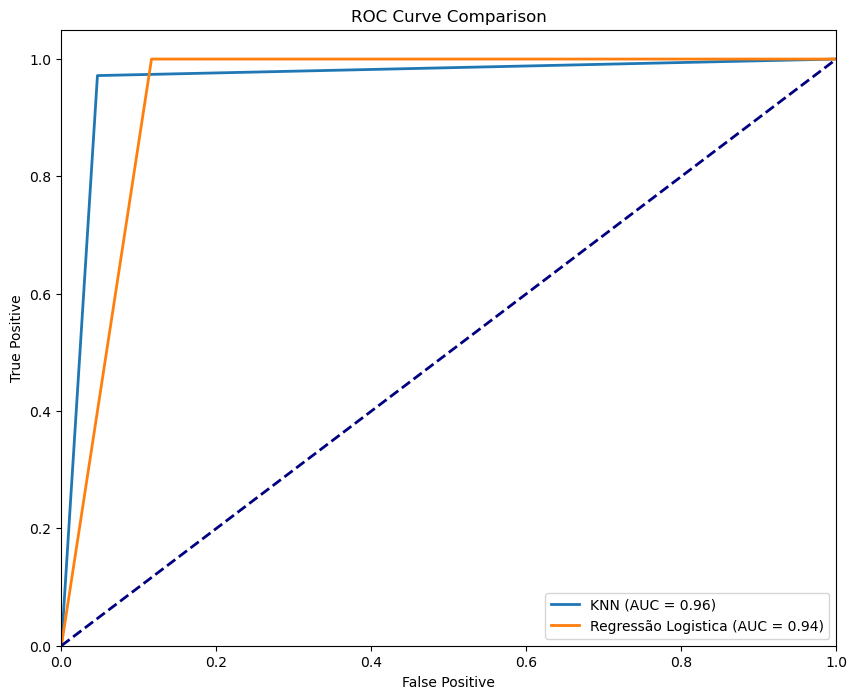

In [ ]:
plt.figure(figsize=(10, 8))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'KNN (AUC = {roc_auc:.2f})')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgr)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'Regressão Logistica (AUC = {roc_auc:.2f})') 

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

#### matriz de confusão do melhor modelo

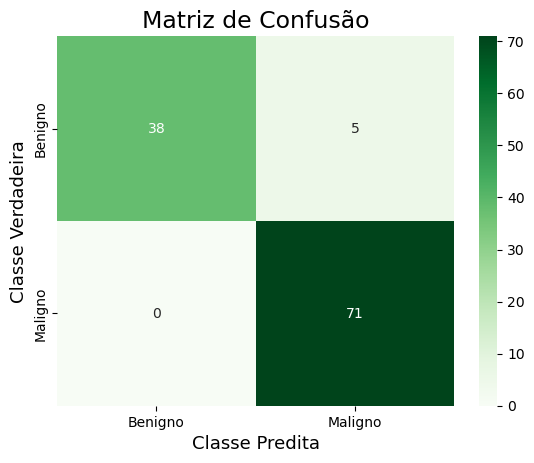

In [ ]:
cm = confusion_matrix(y_test, y_pred_lgr)

sns.heatmap(cm, 
  annot=True,
  fmt='g',
  cmap='Greens',
  xticklabels=['Benigno', 'Maligno'],
  yticklabels=['Benigno', 'Maligno'])

plt.ylabel('Classe Verdadeira', fontsize=13)
plt.xlabel('Classe Predita', fontsize=13)
plt.title('Matriz de Confusão', fontsize=17)
plt.show()


_O modelo com melhor desempenho, tanto na validação cruzada quanto no conjunto de holdout, foi o de regressão logística. No entanto, o modelo baseline (KNN) apresentou desempenho superior ao analisar a curva ROC. Apesar de serem algoritmos bastante diferentes, ambos os modelos foram consistentes nas métricas avaliadas, demonstrando baixa variância nos resultados. Em ambos os casos, o recall foi a métrica com melhor desempenho, e a diferença entre os modelos foi pequena com um pouco mais de 1% no melhor resultado. Para o dataset de Breast Cancer, o modelo de regressão logística alcançou pontuação máxima em mais de uma métrica, o que pode ser considerado um fator importante na escolha mais consciente do modelo, especialmente em comparação ao KNN._